In [49]:
# AUTHOR: Akhila Reddy Kommiti
# COURSE: ADTA 5410
# PROGRAM: In-class
# PURPOSE: To perform simple linear regression on the OWID dataset

# PROCESS: Analysed all the questions and answered correctly.

# OUTPUT: Answered all the questions performned linear regressions and plot
# the graphs.

# HONOR CODE: On my honor, I have neither given
# nor received unauthorized aid on this academic work, to
# include the assistance from others in the class, the use of
# generative AI to produce the original code, or the use of
# code obtained from external sources such as stacked
# overflow, in example. I realize the use of unauthorized
# will at a minimum result in a zero for this assignment and
# and may lead to further honor code disciplinary results

In [50]:
# !pip install statsmodels matplotlib pandas scikit-learn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### a. Perform Simple Linear Regression

In [51]:
# Read the data from the CSV file.
df = pd.read_csv("owid-covid-data.csv")

# drop rows with missing values
df.dropna(subset=['total_cases', 'stringency_index', 'gdp_per_capita'], inplace=True)

In [52]:
# Define the predictors and response.
X = df[['stringency_index', 'gdp_per_capita']]
y = df['total_cases']

# Add a constant to the model (intercept).
X = sm.add_constant(X)

# Fit the model.
model = sm.OLS(y, X).fit()

# Print the regression summary.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2473.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:24:09   Log-Likelihood:            -3.1330e+06
No. Observations:              184582   AIC:                         6.266e+06
Df Residuals:                  184579   BIC:                         6.266e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.55e+06   2.92e+04  

#### Regression Output and Comments
- **Statistical Significance** : Both predictors (`stringency_index` and `gdp_per_capita`) are statistically significant, as indicated by their p-values < 0.05.
- **Coefficients** :
 `stringency_index`: Negative coefficient suggests that stricter measures are associated with fewer cases.
`gdp_per_capita`: Positive coefficient indicates a higher number of cases in wealthier regions.
- **R-squared** : Very low (0.026), indicating the model explains only 2.6% of the variance in `total_cases`. This suggests a weak model fit.
- **Durbin-Watson** : Low value implies potential autocorrelation.
- **Condition Number** : High, suggesting potential multicollinearity or numerical issues.

### b. Is there a relationship between the predictors and the response?
- Based on the p-values of the coefficients, both stringency index and GDP per capita are statistically significant predictors of total cases. The p-value for stringency index is 0.000, and the p-value for GDP per capita is also 0.000. Since these p-values are less than the significance level of 0.05, we can conclude that there is a relationship between the predictors and the response.

### c. How strong is the relationship between the predictor and the response?
-  We can assess the strength of the relationship by looking at the R-squared value in the regression output. R-squared indicates the percentage of variance in the response variable (total_cases) that is explained by the predictors.

 **R-squared values:**



*   Near 1: Strong relationship.
   
*   Near 0: Weak or no relationship.

The relationship is weak, as indicated by the low R-squared value of 0.026, meaning only 2.6% of the variance in `total_cases` is explained by the model.

### d. Is the relationship between the predictor and the response positive or negative?
- **Stringency Index** : Negative relationship (higher stringency, fewer cases).
- **GDP per Capita** : Positive relationship (higher GDP, more cases).


- the sign of the coefficient determines the direction of the relationship. The negative coefficient for stringency index indicates a negative relationship, meaning that as the stringency index increases, the total cases decrease. The positive coefficient for GDP per capita indicates a positive relationship, meaning that as the GDP per capita increases, the total cases also increase. If the coefficient is positive, it means that as the predictor increases, the response increases. If the coefficient is negative, the response decreases as the predictor increases.

### e.What is the predicted “total_cases” associated with the value given in the value column?
- To predict the total cases associated with a specific value of the predictors, you can use the regression equation.
- formula :
total_cases_pred = 1.55 X 10^6 - 2.001 X 10^4 X stringency + 39.4284 X gdp_per_capita

For example, if the stringency index is 50 and the GDP per capita is $40,000, you can calculate the predicted total cases as follows:

predicted_total_cases = 1.55*10^06 - (2.001e+04 * 50) + (39.4284 * 40000) = 2126636.0

### f. Plot two charts with the response and each of the predictors.


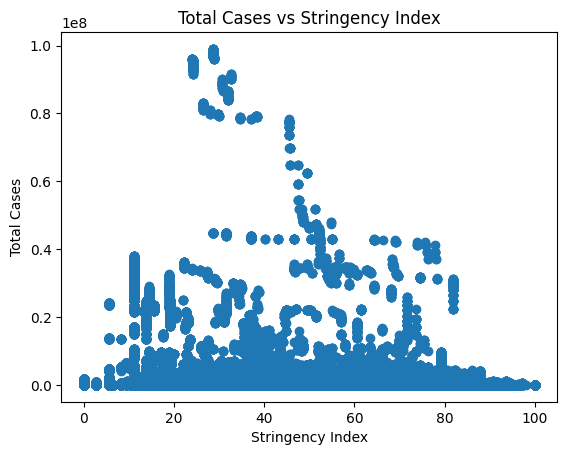

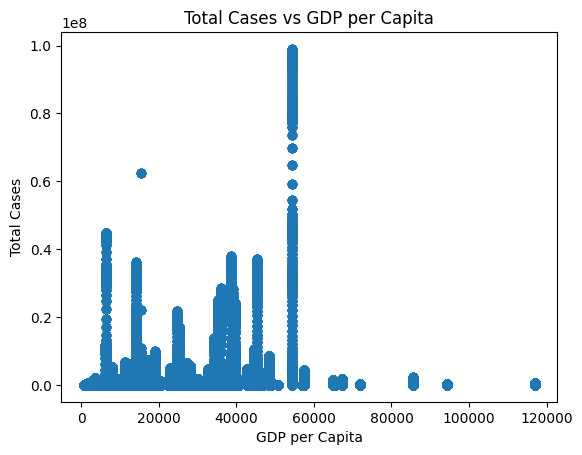

In [53]:
# Plot Total Cases vs Stringency Index
plt.scatter(df['stringency_index'], df['total_cases'])
plt.xlabel('Stringency Index')
plt.ylabel('Total Cases')
plt.title('Total Cases vs Stringency Index')
plt.show()

# Plot Total Cases vs GDP per Capita
plt.scatter(df['gdp_per_capita'], df['total_cases'])
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')
plt.title('Total Cases vs GDP per Capita')
plt.show()

### g. Do you think your variable is a good predictor?
- No, the weak R-squared value suggests that these predictors do not effectively explain the variation in total cases. If the p-value is small and the R-squared value is high, then the predictor is useful.

## 2. Discriminant Analysis

In [54]:
# Assume df is your DataFrame with necessary columns filtered and non-null.
df = pd.read_csv("owid-covid-data.csv")

df.dropna(subset=['total_cases', 'stringency_index'], inplace=True)

# Bin total cases into categories (e.g., Low, Medium, High).
df['total_cases_category'] = pd.qcut(df['total_cases'], q=3, labels=['Low', 'Medium', 'High'])

# Prepare the features and target
X = df[['stringency_index']]
y = df['total_cases_category']

# Encode target categories
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Apply LDA
lda = LDA()
lda.fit(X, y_encoded)

# Predict categories
df['predicted_category'] = le.inverse_transform(lda.predict(X))

print(df[['stringency_index', 'total_cases_category', 'predicted_category']].head())

   stringency_index total_cases_category predicted_category
0               0.0                  Low               High
1               0.0                  Low               High
2               0.0                  Low               High
3               0.0                  Low               High
4               0.0                  Low               High



## 3. Create your own question and provide the answer.


## Q: How can the relationship between the predictor and response variables be visually analyzed?



**Answer:** The relationship can be visually analyzed using scatter plots and regression lines, plotting the stringency index on the x-axis and total cases on the y-axis for different regions.

##Q: How do you predict values using the trained linear regression model in statsmodels?

In [55]:
X_new = pd.DataFrame({'const': [1], 'stringency_index': [50], 'gdp_per_capita': [40000]})
predicted_value = model.predict(X_new)
print(predicted_value)


0    2.126056e+06
dtype: float64


## Q: How do you check for missing values in a DataFrame using Pandas?

In [56]:
import pandas as pd

# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


iso_code                                        0
continent                                       0
location                                        0
date                                            0
total_cases                                     0
                                            ...  
excess_mortality_cumulative                183281
excess_mortality                           183281
excess_mortality_cumulative_per_million    183281
total_cases_category                            0
predicted_category                              0
Length: 69, dtype: int64


##Q: How do you plot two separate scatter plots for two predictors against the response variable?

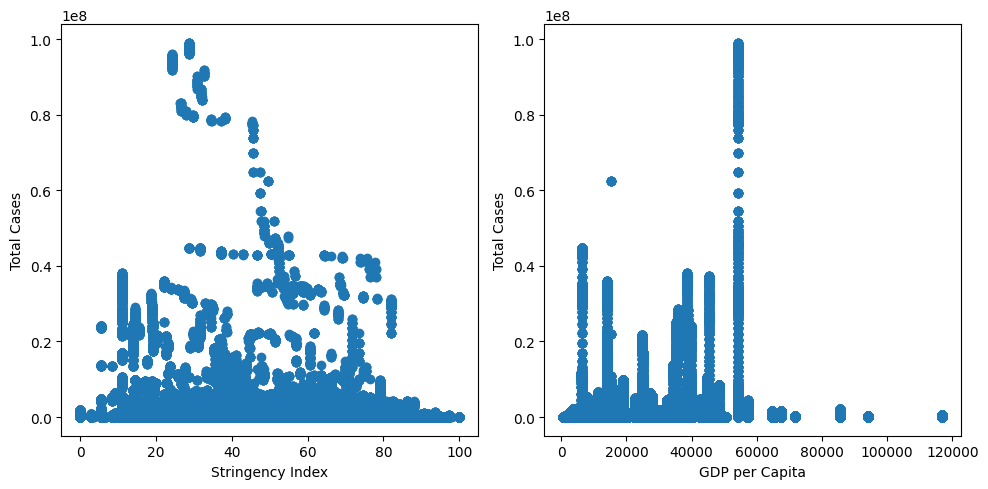

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(df['stringency_index'], df['total_cases'])
plt.xlabel('Stringency Index')
plt.ylabel('Total Cases')

plt.subplot(1, 2, 2)
plt.scatter(df['gdp_per_capita'], df['total_cases'])
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')

plt.tight_layout()
plt.show()
